In [1]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import os
from csbdeep.utils import normalize
from stardist.models import StarDist2D
from stardist.plot import render_label
from utils.helpers import clean_mask, cut_out_image

In [2]:
model = StarDist2D.from_pretrained('2D_versatile_he')

Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


In [3]:
image_paths = sorted(["data/images/"+path for path in os.listdir("data/images") if not path.startswith(".")])
mask_paths = sorted(["data/masks/"+path for path in os.listdir("data/masks") if not path.startswith(".")])
images = list(map(tifffile.imread, image_paths))
masks = list(map(tifffile.imread, mask_paths))
data = list(zip(images, masks))

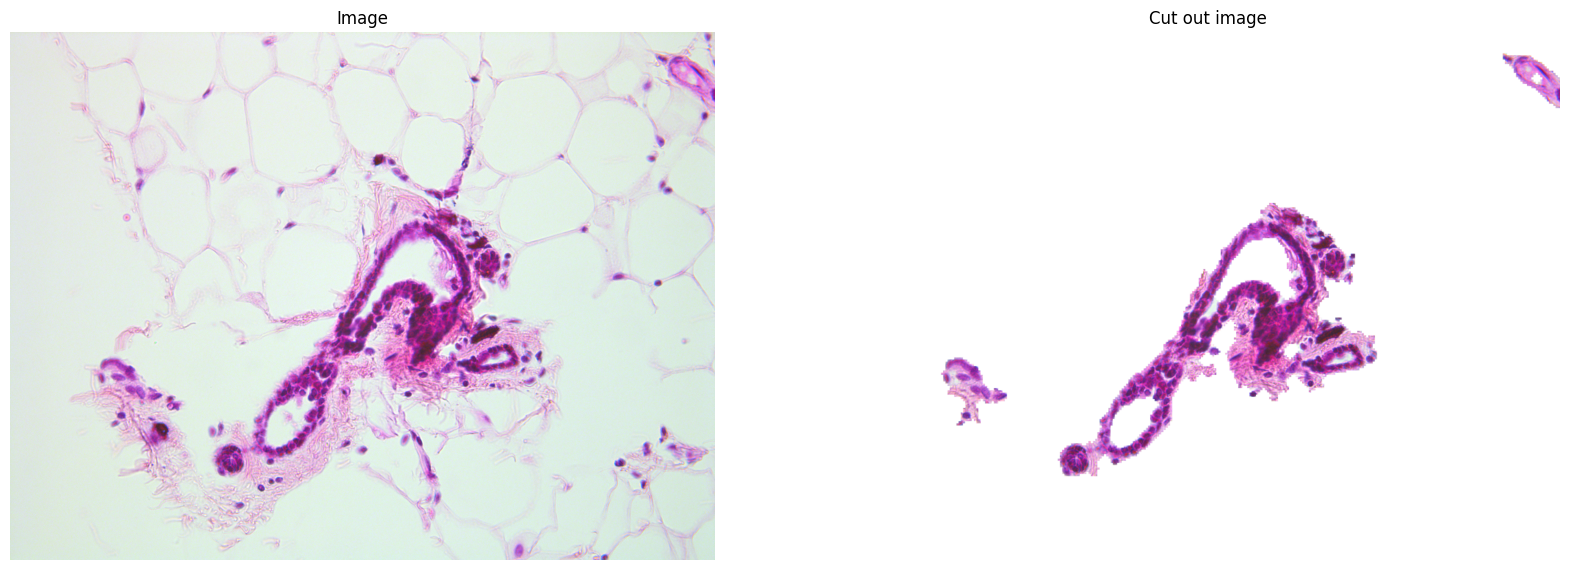

In [4]:
test_image = images[0]
test_mask = masks[0]

cleaned_mask = clean_mask(test_mask)
cut_image = cut_out_image(test_image, cleaned_mask)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.axis("off")
plt.title("Image")

plt.subplot(1, 2, 2)
plt.imshow(cut_image)
plt.axis("off")
plt.title("Cut out image")

plt.show()

Intensity range: [0.0 - 1.0]
Array type: float64


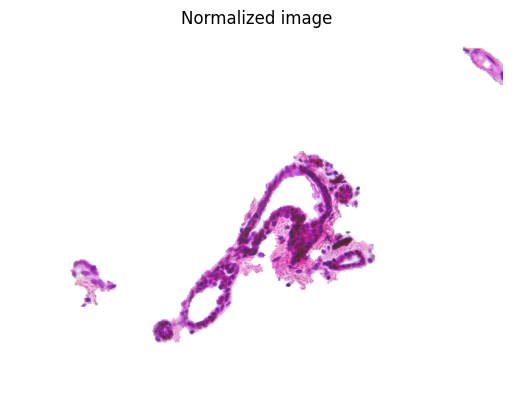

In [5]:
from skimage.exposure import rescale_intensity

image_normed = rescale_intensity(cut_image, out_range=(0, 1))

print(f'Intensity range: [{image_normed.min()} - {image_normed.max()}]')
print(f'Array type: {image_normed.dtype}')

plt.imshow(image_normed)
plt.axis("off")
plt.title("Normalized image")
plt.show()

In [1]:
# for image, mask in data:
#     cleaned_mask = clean_mask(mask)
#     cut_image = cut_out_image(image, cleaned_mask)
#     image_normed = rescale_intensity(cut_image, out_range=(0, 1))

#     labels, data_dict = model.predict_instances(image_normed, axes='YXC', prob_thresh=0.05, nms_thresh=0.3, return_labels=True)

#     plt.figure(figsize=(24, 12))

#     plt.subplot(1,2,1)
#     plt.imshow(image, cmap="gray")
#     plt.axis("off")
#     plt.title("input image")

#     plt.subplot(1,2,2)
#     plt.imshow(render_label(labels, img=image_normed, cmap=(1.0, 1.0, 0), alpha=0.6))
#     plt.axis("off")
#     plt.title("prediction + input overlay")

#     plt.show()